<a href="https://colab.research.google.com/github/ssddatascience/mycodesfordatascience/blob/main/introductionnewproductinmarketprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from numpy import nan
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import seaborn as sns

In [4]:
df1 = pd.read_csv("DataSet.csv", encoding='latin1')
df1.head()


,day,customer_id,product_type,product_title,shipping_city,shipping_region,orders,gross_sales,discounts,returns,net_sales,shipping,duties,additional_fees,taxes,total_sales,ordered_item_quantity
0,01/01/22,5.440000e+12,Maternity and Nursing Top,Rose Melange Maternity and Feeding Sweatshirt ...,Panipat,Haryana,1,1439.83,-316.76,0.0,1123.07,0,0,0,202.15,1325.22,1
1,01/01/22,5.730000e+12,Baby Oil,100% Natural Cold Pressed Virgin Coconut Oil f...,Gurgaon,Haryana,1,422.03,-42.20,0.0,379.83,0,0,0,68.37,448.20,1
2,01/01/22,5.730000e+12,NaN,NaN,Gurgaon,Haryana,0,0.00,0.00,0.0,0.00,0,0,0,0.00,0.00,0
3,01/01/22,5.730000e+12,Baby Anti-Slip Socks,Socks with a Soul Combo - Baby Polar Bear & Sw...,Gurgaon,Haryana,1,677.12,-67.71,0.0,609.41,0,0,0,109.69,719.10,1
4,01/01/22,5.770000e+12,NaN,NaN,Ghaziabad,Uttar Pradesh,0,0.00,0.00,0.0,0.00,0,0,0,0.00,0.00,0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83356 entries, 0 to 83355
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   day                    83356 non-null  object 
 1   customer_id            83356 non-null  float64
 2   product_type           50320 non-null  object 
 3   product_title          52658 non-null  object 
 4   shipping_city          83163 non-null  object 
 5   shipping_region        82948 non-null  object 
 6   orders                 83356 non-null  int64  
 7   gross_sales            83356 non-null  float64
 8   discounts              83356 non-null  float64
 9   returns                83356 non-null  float64
 10  net_sales              83356 non-null  float64
 11  shipping               83356 non-null  int64  
 12  duties                 83356 non-null  int64  
 13  additional_fees        83356 non-null  int64  
 14  taxes                  83356 non-null  float64
 15  to

In [7]:
df1["product_type"].fillna(value= False, inplace=True)
df1["product_title"].fillna(value= False, inplace=True)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83356 entries, 0 to 83355
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   day                    83356 non-null  object 
 1   customer_id            83356 non-null  float64
 2   product_type           83356 non-null  object 
 3   product_title          83356 non-null  object 
 4   shipping_city          83163 non-null  object 
 5   shipping_region        82948 non-null  object 
 6   orders                 83356 non-null  int64  
 7   gross_sales            83356 non-null  float64
 8   discounts              83356 non-null  float64
 9   returns                83356 non-null  float64
 10  net_sales              83356 non-null  float64
 11  shipping               83356 non-null  int64  
 12  duties                 83356 non-null  int64  
 13  additional_fees        83356 non-null  int64  
 14  taxes                  83356 non-null  float64
 15  to

In [9]:
df1.describe()

,customer_id,orders,gross_sales,discounts,returns,net_sales,shipping,duties,additional_fees,taxes,total_sales,ordered_item_quantity
count,8.335600e+04,83356.000000,83356.000000,83356.000000,83356.000000,83356.000000,83356.000000,83356.0,83356.0,83356.000000,83356.000000,83356.000000
mean,5.804192e+12,0.636871,725.928229,-68.388569,-36.573132,620.966529,12.926220,0.0,0.0,110.483375,744.376123,0.662280
std,7.416702e+11,0.506871,1070.540673,203.364619,421.391270,951.637616,75.940269,0.0,0.0,169.006533,1110.637727,1.189308
min,0.000000e+00,0.000000,0.000000,-13552.540000,-35163.690000,-16779.660000,-2000.000000,0.0,0.0,-3020.340000,-19800.000000,0.000000
25%,5.840000e+12,0.000000,0.000000,-71.180000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,5.970000e+12,1.000000,474.570000,0.000000,0.000000,417.630000,0.000000,0.0,0.0,75.170000,492.800000,1.000000
75%,6.130000e+12,1.000000,1100.850000,0.000000,0.000000,1016.100000,0.000000,0.0,0.0,182.900000,1199.000000,1.000000
max,6.310000e+12,5.000000,42351.700000,0.000000,19579.200000,28799.160000,2500.000000,0.0,0.0,5183.850000,33983.000000,299.000000


In [11]:
df1.columns


Index(['day', 'customer_id', 'product_type', 'product_title', 'shipping_city',
       'shipping_region', 'orders', 'gross_sales', 'discounts', 'returns',
       'net_sales', 'shipping', 'duties', 'additional_fees', 'taxes',
       'total_sales', 'ordered_item_quantity'],
      dtype='object')

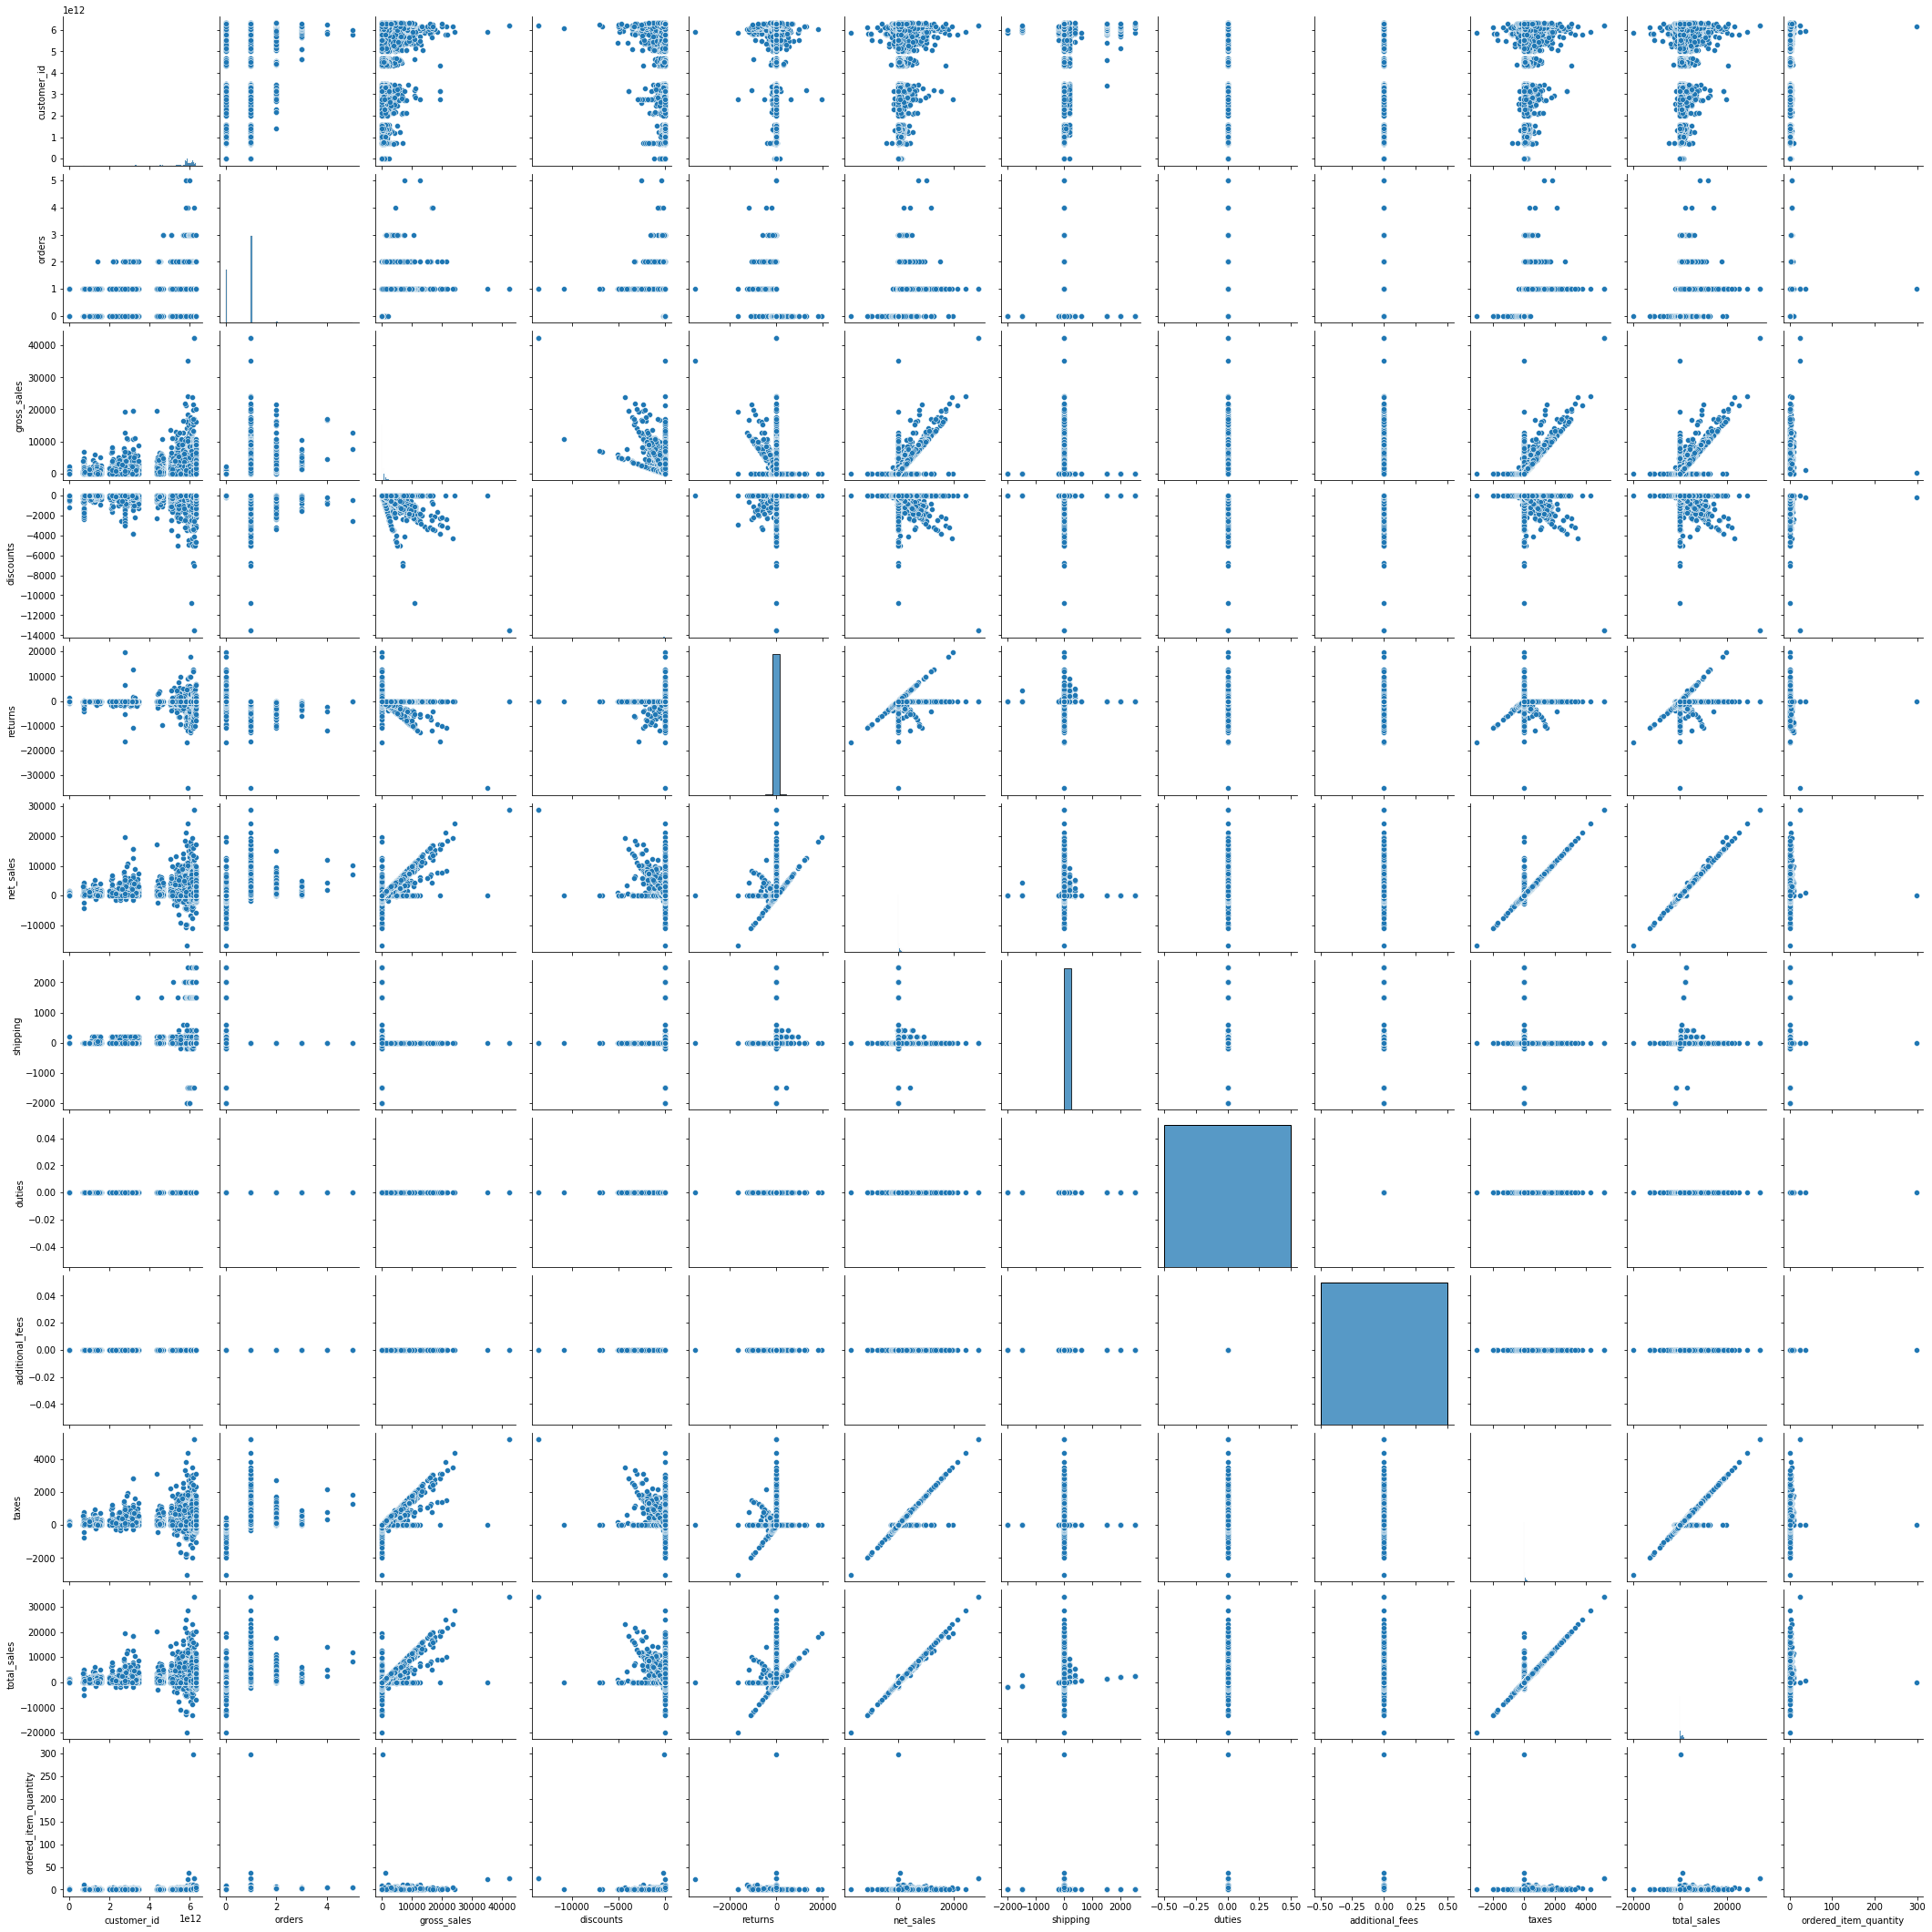

In [12]:
sns.pairplot(df1)

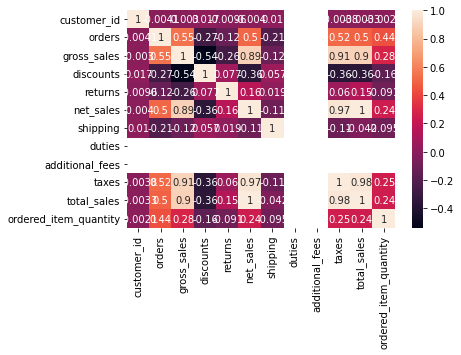

In [14]:
sns.heatmap(df1. corr(), annot=True)

In [15]:
df1.columns


Index(['day', 'customer_id', 'product_type', 'product_title', 'shipping_city',
       'shipping_region', 'orders', 'gross_sales', 'discounts', 'returns',
       'net_sales', 'shipping', 'duties', 'additional_fees', 'taxes',
       'total_sales', 'ordered_item_quantity'],
      dtype='object')

In [23]:
X = df1[[ 'orders', 'gross_sales', 'discounts', 'returns',
       'net_sales', 'shipping', 'taxes', 'ordered_item_quantity']]

y = df1[['total_sales']]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

In [25]:
X_train

,orders,gross_sales,discounts,returns,net_sales,shipping,taxes,ordered_item_quantity
39548,1,7486.48,-898.37,0.00,6588.11,0,1185.86,1
20791,1,846.61,-84.66,-761.95,0.00,0,0.00,1
44421,1,1355.08,0.00,0.00,1355.08,0,243.92,1
28903,1,422.88,0.00,0.00,422.88,0,76.12,1
26688,1,677.11,-101.56,0.00,575.55,0,103.60,1
...,...,...,...,...,...,...,...,...
49751,0,0.00,0.00,0.00,0.00,0,0.00,0
5695,1,592.37,0.00,0.00,592.37,0,106.63,1
73542,1,1863.56,0.00,0.00,1863.56,0,335.44,1
83281,0,0.00,0.00,0.00,0.00,0,0.00,0


In [42]:
from sklearn.linear_model import LinearRegression


In [46]:
lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [47]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['coefficient'])

ValueError: ignored

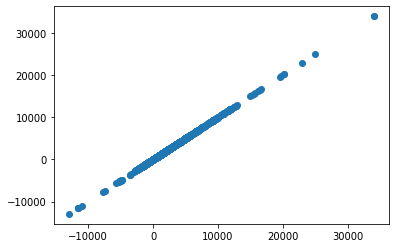

In [49]:
prediction = lm.predict(X_test)
plt.scatter(y_test,prediction)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


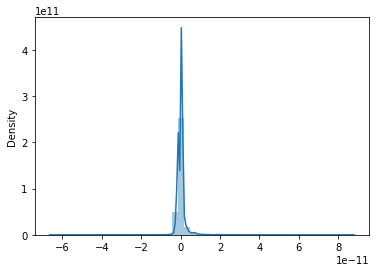

In [51]:
sns.distplot((y_test-prediction),bins=50)